In [1]:
import os

import numpy as np
import pandas as pd

from natsort import natsorted

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# I/O
main = pd.read_csv(os.path.join(os.getcwd(), 'input/main.csv'))  

out = os.path.join(os.getcwd(), 'output/cells_per_patch')
if not os.path.exists(out):
    os.makedirs(out)

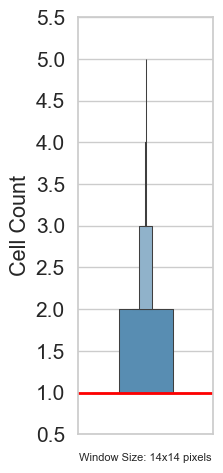

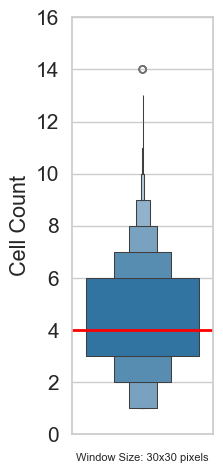

In [3]:
# generate boxen plots of the distribution of nuclei for VAE9 and VAE20 image patches
for window_size in [14, 30]:  # in square pixels

    if not os.path.exists(os.path.join(out, f'counts{window_size}.csv')):

        print(f'Working on window size {window_size}.')
        
        radius = window_size / 2
        
        counts = []
        for i, j in main.iterrows():
            if i % 10000 == 0:
                print(i)
            
            # isolate cells in window_size x window_size pixel area and 
            # append nuclei count to counts list
            x = j['X_centroid']
            y = j['Y_centroid']
            patch = (
                main[(main['Y_centroid'].between(y - radius, y + radius)) &
                        (main['X_centroid'].between(x - radius, x + radius))].copy()
            )
            counts.append(len(patch))

        plot = pd.DataFrame(
            data={f'Window Size: {window_size}x{window_size} pixels': 1, 'Cell Count': counts}
        )

        q1, q3 = np.percentile(plot['Cell Count'], [25, 75])
        iqr = q3 - q1
        plot['Q1'] = q1
        plot['Q3'] = q3
        plot['IQR'] = iqr

        plot.to_csv(os.path.join(out, f'counts{window_size}.csv'), index=False)
        
        plt.rcParams['font.family'] = 'Arial'
        sns.set(font_scale=1.3)
        sns.set_style('whitegrid')
        
        g = sns.catplot(
            data=plot, x=f'Window Size: {window_size}x{window_size} pixels',
            y='Cell Count', kind='boxen', hue=f'Window Size: {window_size}x{window_size} pixels',
            palette=['tab:blue'], aspect=0.5, facet_kws=dict(despine=False), legend=False
        )
        
        # annotate median value on the boxen plot
        median = plot['Cell Count'].median()
        plt.axhline(y=median, color='red', linestyle='-', linewidth=2)
        
        g.ax.xaxis.get_label().set_fontsize(8)
        g.set(xticklabels=[])
        g.set_yticklabels(fontsize=15, weight='normal')
        plt.tight_layout()
        
        plt.savefig(os.path.join(out, f'patch_counts_w{window_size}.pdf'))
        plt.show()
        plt.close('all')
        print()
    
    else:  # if counts.csv has already been saved
        
        plot = pd.read_csv(os.path.join(out, f'counts{window_size}.csv'))

        plt.rcParams['font.family'] = 'Arial'
        sns.set(font_scale=1.3)
        sns.set_style('whitegrid')
        
        g = sns.catplot(
            data=plot, x=f'Window Size: {window_size}x{window_size} pixels',
            y='Cell Count', kind='boxen', hue=f'Window Size: {window_size}x{window_size} pixels',
            palette=['tab:blue'], aspect=0.5, facet_kws=dict(despine=False), legend=False
        )
        
        # annotate median value on the boxen plot
        median = plot['Cell Count'].median()
        plt.axhline(y=median, color='red', linestyle='-', linewidth=2)
        
        g.ax.xaxis.get_label().set_fontsize(8)
        g.set(xticklabels=[])
        g.set_yticklabels(fontsize=15, weight='normal')
        plt.tight_layout()
        
        plt.savefig(os.path.join(out, f'patch_counts_w{window_size}.pdf'))
        plt.show()
        plt.close('all')
        print()

In [4]:
# generate boxen plots of the distribution of nuclei per VAE9 image patch cluster
window_size = 14
radius = window_size / 2

counts = []
means = {}  # dict of mean nuceli values for bar plot below

for clus in natsorted(main['VAE9_ROT_VIG18'].unique()):
    
    print(f'Working on cluster {clus} with window size {window_size}.')
    
    subset = main[main['VAE9_ROT_VIG18'] == clus]
    
    if not os.path.exists(os.path.join(out, f'counts{window_size}_cluster{clus}.csv')):
        
        subset = main[main['VAE9_ROT_VIG18'] == clus]
        subset.reset_index(inplace=True)
        
        for i, j in subset.iterrows():
            if i % 10000 == 0:
                print(i)
            
            # isolate cells in window_size x window_size pixel area and 
            # append nuclei count to counts list
            x = j['X_centroid']
            y = j['Y_centroid']
            patch = (
                main[(main['Y_centroid'].between(y - radius, y + radius)) &
                        (main['X_centroid'].between(x - radius, x + radius))].copy()
            )
            counts.append(len(patch))
    
        plot = pd.DataFrame(
            data={f'Window Size: {window_size}x{window_size} pixels': 1, 'Cell Count': counts}
        )
        
        means[clus] = [plot['Cell Count'].mean()]
        
        q1, q3 = np.percentile(plot['Cell Count'], [25, 75])
        iqr = q3 - q1
        plot['Q1'] = q1
        plot['Q3'] = q3
        plot['IQR'] = iqr
    
        plot.to_csv(os.path.join(out, f'counts{window_size}_cluster{clus}.csv'), index=False)
        
        plt.rcParams['font.family'] = 'Arial'
        sns.set(font_scale=1.3)
        sns.set_style('whitegrid')
        
        g = sns.catplot(
            data=plot, x=f'Window Size: {window_size}x{window_size} pixels', y='Cell Count', kind='boxen',
            hue=f'Window Size: {window_size}x{window_size} pixels', palette=['tab:blue'], aspect=0.5,
            facet_kws=dict(despine=False), legend=False
        )
        
        # annotate median value on the boxen plot
        median = plot['Cell Count'].median()
        plt.axhline(y=median, color='red', linestyle='-', linewidth=2)
        
        g.ax.xaxis.get_label().set_fontsize(8)
        g.set(xticklabels=[])
        g.set_yticklabels(fontsize=15, weight='normal')
        plt.tight_layout()
        
        plt.savefig(os.path.join(out, f'patch_counts_w{window_size}_cluster{clus}.pdf'))
        plt.close('all')

    else:  # if counts.csv for current cluster has already been saved
            
        plot = pd.read_csv(os.path.join(out, f'counts{window_size}_cluster{clus}.csv'))
        
        means[clus] = [plot['Cell Count'].mean()]
        
        plt.rcParams['font.family'] = 'Arial'
        sns.set(font_scale=1.3)
        sns.set_style('whitegrid')
        
        g = sns.catplot(
            data=plot, x=f'Window Size: {window_size}x{window_size} pixels', 
            y='Cell Count', kind='boxen', hue=f'Window Size: {window_size}x{window_size} pixels',
            palette=['tab:blue'], aspect=0.5, facet_kws=dict(despine=False), legend=False
        )
        
        # annotate median value on the boxen plot
        median = plot['Cell Count'].median()
        plt.axhline(y=median, color='red', linestyle='-', linewidth=2)
        
        g.ax.xaxis.get_label().set_fontsize(8)
        g.set(xticklabels=[])
        g.set_yticklabels(fontsize=15, weight='normal')
        plt.tight_layout()
        
        plt.savefig(os.path.join(out, f'patch_counts_w{window_size}_cluster{clus}.pdf'))
        plt.close('all')

# convert means dict to a dataframe and save
means_df = pd.DataFrame.from_dict(means, orient='index')
means_df.to_csv(os.path.join(out, f'cluster_cell_count_means.csv'), index=True)

Working on cluster 0 with window size 14.
0
10000
20000
30000
Working on cluster 1 with window size 14.
0
10000
20000
30000
Working on cluster 2 with window size 14.
0
10000
20000
Working on cluster 3 with window size 14.
0
10000
20000
Working on cluster 4 with window size 14.
0
10000
20000
Working on cluster 5 with window size 14.
0
10000
20000
Working on cluster 6 with window size 14.
0
10000
20000
Working on cluster 7 with window size 14.
0
10000
20000
Working on cluster 8 with window size 14.
0
10000
Working on cluster 9 with window size 14.
0
10000
Working on cluster 10 with window size 14.
0
10000
Working on cluster 11 with window size 14.
0
10000
Working on cluster 12 with window size 14.
0
10000
Working on cluster 13 with window size 14.
0
10000
Working on cluster 14 with window size 14.
0
10000
Working on cluster 15 with window size 14.
0
10000
Working on cluster 16 with window size 14.
0
10000
Working on cluster 17 with window size 14.
0
10000
Working on cluster 18 with windo

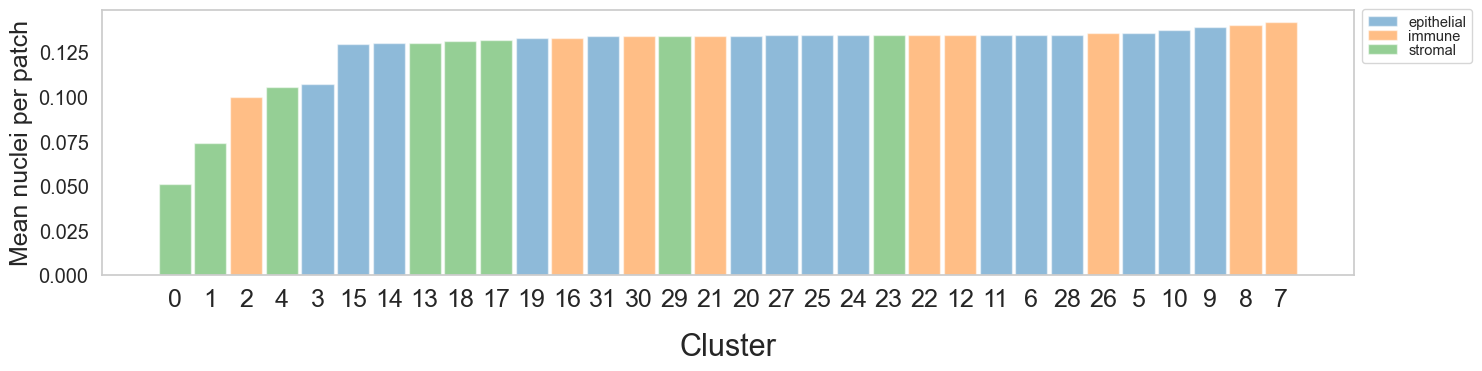

In [5]:
# generate bar plot of mean nuclei values per VAE9 image patch

# read mean nuclei value dataframe
means_df = pd.read_csv(os.path.join(out, 'cluster_cell_count_means.csv'), index_col=0)
means_df = round(means_df, 3)
means_df = pd.Series(means_df['0'])

# sort by mean values in ascending order, then by index
def custom_sort_key(item):
    return (-item[1], item[0])
means_df = sorted(means_df.items(), key=custom_sort_key)
means_df = pd.Series([item[1] for item in means_df], index=[item[0] for item in means_df])
means_df.sort_values(ascending=True, inplace=True)

# clusters associated with epithelial, immune, and stromal cells
epithelial = [24, 25, 20, 14, 31, 9, 10, 3, 5, 6, 11, 15, 19, 27, 28] 
immune = [26, 30, 8, 12, 16, 21, 7, 2, 22]
stromal = [1, 4, 13, 18, 29, 0, 17, 23]

# color LUT
mpp_colors = {}
mpp_colors.update({str(k): v for k, v in zip(epithelial, ['tab:blue']*len(epithelial))})
mpp_colors.update({str(k): v for k, v in zip(immune, ['tab:orange']*len(immune))})
mpp_colors.update({str(k): v for k, v in zip(stromal, ['tab:green']*len(stromal))})

# plot
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(
    x=[str(i) for i in means_df.index], height=np.log(means_df.values),
    color=[mpp_colors[str(i)] for i in means_df.index], alpha=0.5, width=0.9
)
plt.ylabel('Mean nuclei per patch', fontsize=18)
plt.xlabel('Cluster',fontsize=22, labelpad=15)
ticks = plt.xticks(fontsize=18)

patches = [
    Patch(facecolor=color, alpha=0.5, edgecolor=None) for color in ['tab:blue', 'tab:orange', 'tab:green']
    ]
plt.legend(
    patches, ['epithelial', 'immune', 'stromal'],
    title=None, prop={'size': 10.5},
    labelspacing=0.01, bbox_to_anchor=[1.1, 1.03], loc='upper right'
    )
plt.grid(False)

plt.tight_layout()
plt.savefig(os.path.join(out, f'cluster_cell_count_means.pdf'))
plt.show()
plt.close('all')